# Sampling Distribution
### Using Scipy
<code>rvs</code> is all you need

In [3]:
from scipy.stats import norm,uniform
from scipy.integrate import simps
import numpy as np
import matplotlib.pyplot as plt

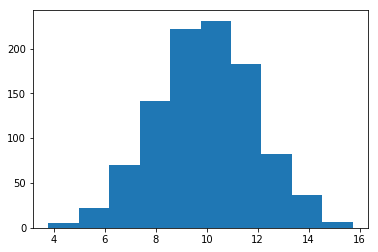

In [5]:
plt.hist(norm.rvs(loc=10,scale=2,size=1000));

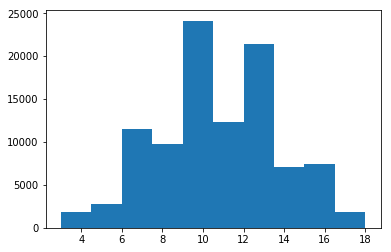

In [13]:
samples = np.ceil(uniform.rvs(loc=0,scale=6,size=(100000,3))).sum(axis=1)
#print(samples)
plt.hist(samples);

# Rejection Sampling

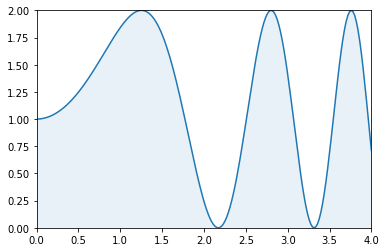

In [14]:
def pdf(x):
    return np.sin(x**2)+1
xs = np.linspace(0,4,200)
ps = pdf(xs)
plt.plot(xs,ps)
plt.fill_between(xs,0,ps,alpha=0.1)
plt.xlim(0,4)
plt.ylim(0,2);

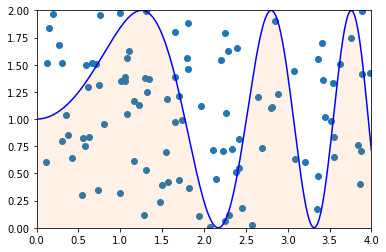

In [16]:
n=100
random_x = uniform.rvs(loc=0,scale=4,size=n)
random_y= uniform.rvs(loc=0,scale=2,size=n)
plt.scatter(random_x,random_y)
plt.plot(xs,ps,c="b")
plt.fill_between(xs,0,ps,alpha=0.1)
plt.xlim(0,4)
plt.ylim(0,2);


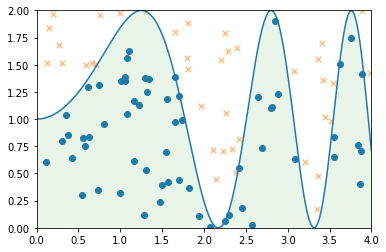

In [17]:
passed = random_y <=pdf(random_x)
plt.scatter(random_x[passed],random_y[passed])
plt.scatter(random_x[~passed],random_y[~passed],marker="x",s=30,alpha=0.5)
plt.plot(xs,ps)
plt.fill_between(xs,0,ps,alpha=0.1)
plt.xlim(0,4)
plt.ylim(0,2);



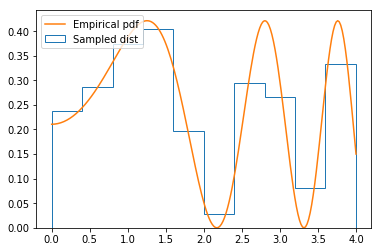

In [20]:
n2=10000
x_test = uniform.rvs(scale=4,size=n2)
x_final = x_test[uniform.rvs(scale=2,size=n2)<=pdf(x_test)]
from scipy.integrate import simps
plt.hist(x_final,density=True,histtype="step",label="Sampled dist")
plt.plot(xs,ps/simps(ps,x=xs),label="Empirical pdf")
plt.legend(loc=2);

# Inverse Sampling

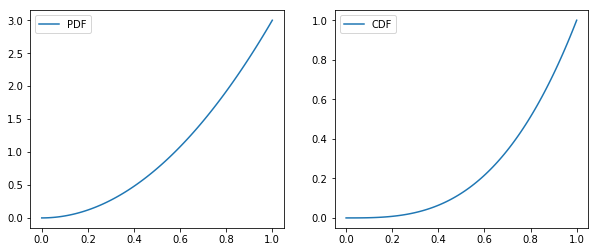

In [23]:
def pdf(x):
    return 3* x**2
def cdf(x):
    return x**3
def icdf(cdf):
    return cdf**(1/3)
xs = np.linspace(0,1,100)
pdfs = pdf(xs)
cdfs=cdf(xs)
fig,axes = plt.subplots(ncols=2,figsize=(10,4))
axes[0].plot(xs,pdfs,label="PDF")
axes[1].plot(xs,cdfs,label="CDF")
axes[0].legend(),axes[1].legend();